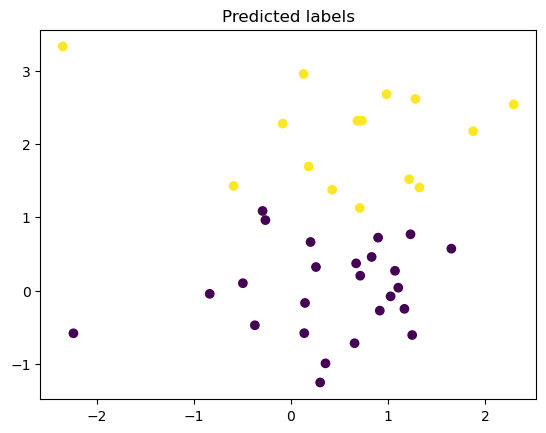

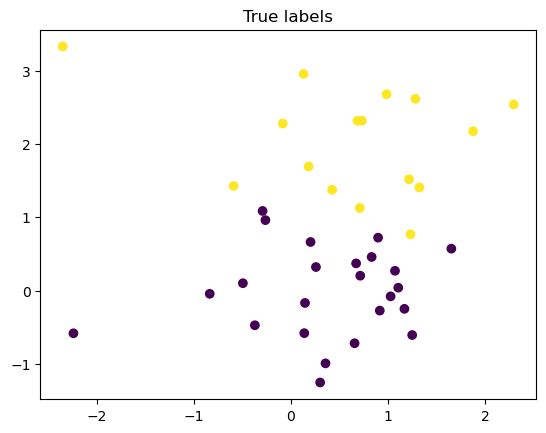

In [102]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

n = 100


#Generate uniform distribution from 0 to 1
U1 = np.random.uniform(0,1,n)
V1 = np.random.uniform(0,1,n)
U2 = np.random.uniform(0,1,n)
V2 = np.random.uniform(0,1,n)


mean1 = 0
X1_1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*V1)+mean1
X2_1 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*V1)+mean1

mean2 = 1
X1_2 = np.sqrt(-2*np.log(U2))*np.cos(2*np.pi*V2)+mean2
X2_2 = np.sqrt(-2*np.log(U2))*np.sin(2*np.pi*V2)+mean2


X1 = np.concatenate((X1_1,X1_2))
X2 = np.concatenate((X2_1,X2_2))

X = np.array([(x1,x2) for x1,x2 in zip(X1,X2)])


kmeans = KMeans(n_clusters=2).fit(X)
cluster_labels = kmeans.labels_


#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, cluster_labels, test_size=0.2, random_state=42)

#fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Get B1 and B2 coefficients from logistic regression

B1 = logreg.coef_[0][0]
B2 = logreg.coef_[0][1]


#Predict y values using logistic regression
y_pred = logreg.predict(X_test)

#Plor the prediction results with the color depending on the label
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.title("Predicted labels")
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title("True labels")
plt.show()



